In [30]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

db_path = "kbs.sqlite3"  
conn = sqlite3.connect(db_path)

query = """
    SELECT st_info.student_id, st_info.st_name, st_info.st_address, st_info.st_contact,
           st_marks.computer, st_marks.science, st_marks.math, st_marks.nepali, st_marks.english,
           (st_marks.computer + st_marks.science + st_marks.math + st_marks.nepali + st_marks.english) AS total_marks,
           ROUND((st_marks.computer + st_marks.science + st_marks.math + st_marks.nepali + st_marks.english) / 5.0, 2) AS percentage
    FROM st_info
    INNER JOIN st_marks ON st_info.student_id = st_marks.st_id
"""

df = pd.read_sql_query(query, conn)
print(df)
conn.close()


   student_id           st_name st_address  st_contact  computer  science  \
0           1       Biraj Rijal     Boudha    12341232        70       70   
1           2        Indra Lama   Tinchuli   893645623        88        8   
2           4  Bhupendra Gurung      Tokha  2439587423        68       87   
3           6     Suntali Karki   Tinchuli   284375423        67       76   

   math  nepali  english  total_marks  percentage  
0    70      70       70          350        70.0  
1    88      88       88          360        72.0  
2    66      78       73          372        74.4  
3    56      77       68          344        68.8  


In [31]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   4 non-null      int64  
 1   st_name      4 non-null      object 
 2   st_address   4 non-null      object 
 3   st_contact   4 non-null      int64  
 4   computer     4 non-null      int64  
 5   science      4 non-null      int64  
 6   math         4 non-null      int64  
 7   nepali       4 non-null      int64  
 8   english      4 non-null      int64  
 9   total_marks  4 non-null      int64  
 10  percentage   4 non-null      float64
dtypes: float64(1), int64(8), object(2)
memory usage: 484.0+ bytes
None


In [13]:
top_students = df.nlargest(5, 'percentage')[['st_name', 'total_marks', 'percentage']].reset_index()
print(top_students)

   index           st_name  total_marks  percentage
0      2  Bhupendra Gurung          372        74.4
1      1        Indra Lama          360        72.0
2      0       Biraj Rijal          350        70.0
3      3     Suntali Karki          344        68.8


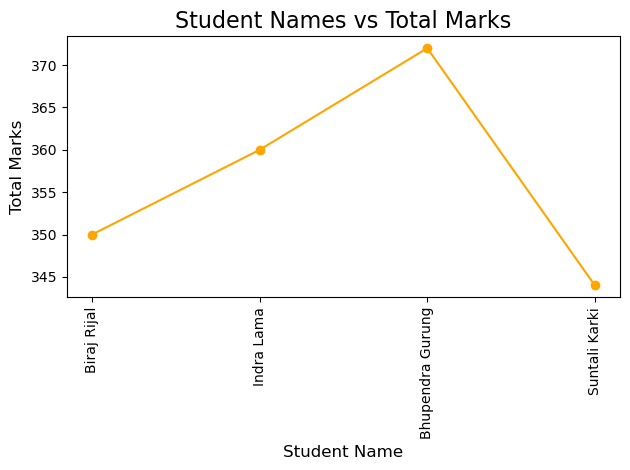

In [34]:
df['total_marks'] = df['computer'] + df['science'] + df['math'] + df['nepali'] + df['english']

plt.plot(df['st_name'], df['total_marks'], marker='o', color='orange')

plt.title('Student Names vs Total Marks', fontsize=16)
plt.xlabel('Student Name', fontsize=12)
plt.ylabel('Total Marks', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Average Marks Per Subject 

In [20]:
avg_marks = df[['computer', 'science', 'math', 'nepali', 'english']].mean().reset_index()
print(avg_marks)

      index      0
0  computer  73.25
1   science  60.25
2      math  70.00
3    nepali  78.25
4   english  74.75


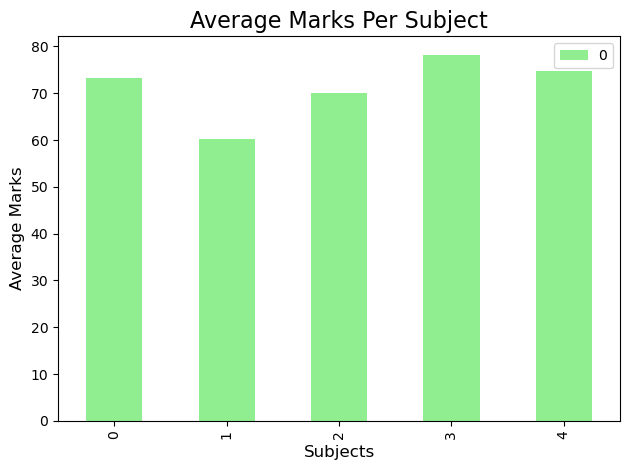

In [36]:
avg_marks.plot(kind='bar', color='lightgreen')

plt.title('Average Marks Per Subject', fontsize=16)
plt.xlabel('Subjects', fontsize=12)
plt.ylabel('Average Marks', fontsize=12)
plt.tight_layout()
plt.show()
